In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import probplot
import seaborn as sns

In [43]:
CPSch3 = pd.read_csv('./data/CPSch3.csv')
male_earnings = CPSch3[CPSch3['sex'] == 'male']['ahe']

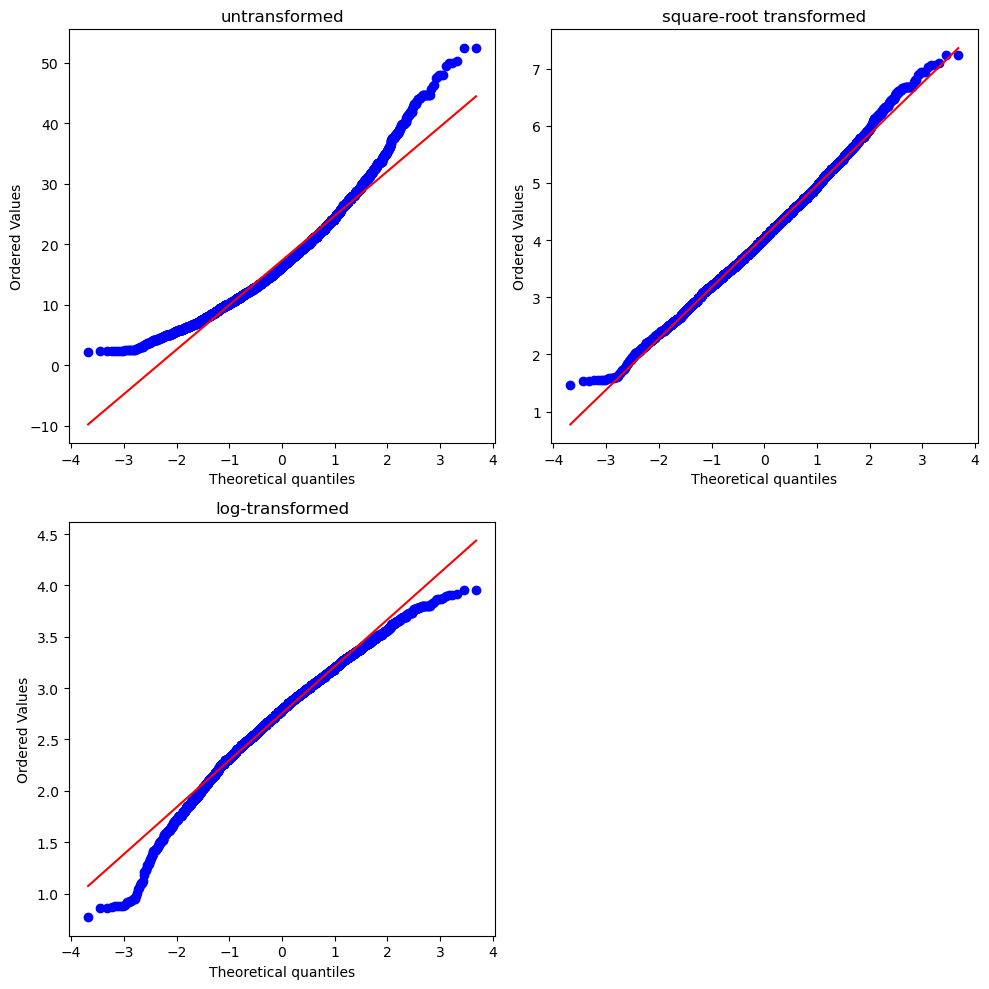

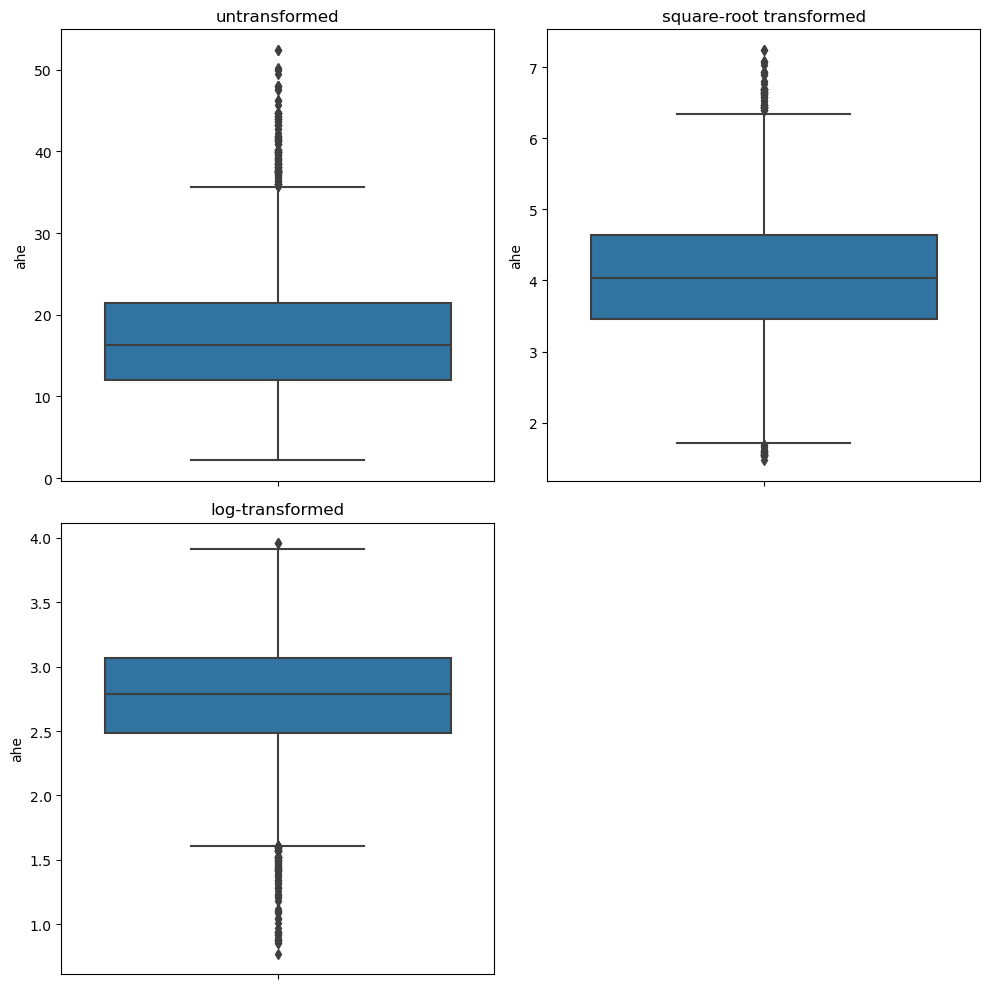

/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tonghuang/opt/anaconda3/envs/nlp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


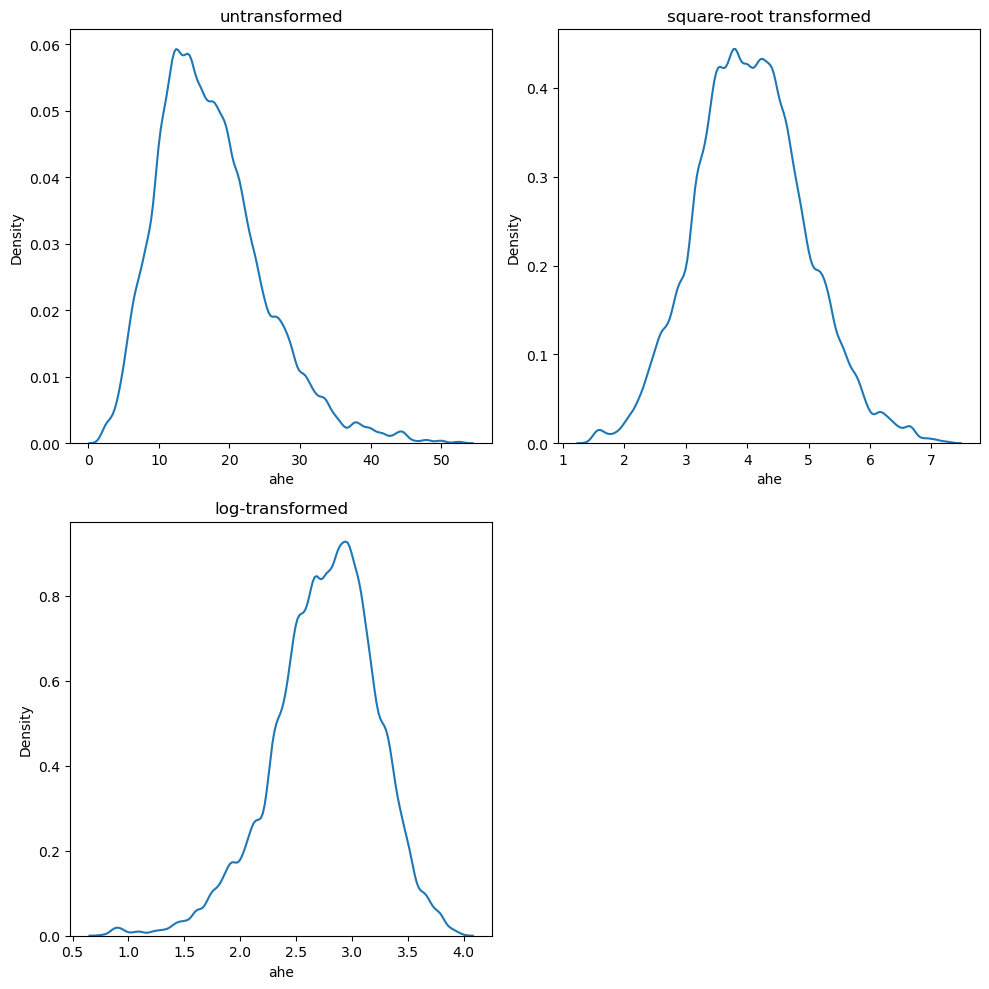

In [44]:
sqrt_male_earnings = np.sqrt(male_earnings)
log_male_earnings = np.log(male_earnings)

# QQ Plots
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
probplot(male_earnings, dist="norm", plot=plt)
plt.title('untransformed')

plt.subplot(2, 2, 2)
probplot(sqrt_male_earnings, dist="norm", plot=plt)
plt.title('square-root transformed')

plt.subplot(2, 2, 3)
probplot(log_male_earnings, dist="norm", plot=plt)
plt.title('log-transformed')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=male_earnings)
plt.title('untransformed')

plt.subplot(2, 2, 2)
sns.boxplot(y=sqrt_male_earnings)
plt.title('square-root transformed')

plt.subplot(2, 2, 3)
sns.boxplot(y=log_male_earnings)
plt.title('log-transformed')

plt.tight_layout()
plt.show()

# Density Plots
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.kdeplot(male_earnings, bw_adjust=0.5)
plt.title('untransformed')

plt.subplot(2, 2, 2)
sns.kdeplot(sqrt_male_earnings, bw_adjust=0.5)
plt.title('square-root transformed')

plt.subplot(2, 2, 3)
sns.kdeplot(log_male_earnings, bw_adjust=0.5)
plt.title('log-transformed')

plt.tight_layout()
plt.show()

Based on three types of graphs shown above, we can see that the square root transformation provides the most symmetric distritbution.

In [55]:
from scipy.stats import boxcox
from scipy import stats
from scipy.stats import chi2

In [51]:
lam = np.arange(-2, 2 + 0.1/2, 0.1)

boxcox(male_earnings)

(array([4.22274513, 3.94480955, 4.99544569, ..., 4.31155968, 4.53756996,
        3.83752879]),
 0.36109587478535093)

In [54]:
lambda_range = np.linspace(0.3, 0.45, 100)

log_likelihood = np.array([stats.boxcox_llf(lmb, male_earnings) for lmb in lambda_range])

max_ll_index = np.argmax(log_likelihood)
max_ll_lambda = lambda_range[max_ll_index]
print(f'MLE of lambda: {max_ll_lambda:.3f}')

MLE of lambda: 0.361


In [57]:
chi2_val = chi2.ppf(0.95, 1) / 2
ci_indices = np.where(log_likelihood >= max(log_likelihood) - chi2_val)[0]
ci_lambda = lambda_range[ci_indices]
print(f'95% confidence interval for lambda: {ci_lambda.min():.3f} to {ci_lambda.max():.3f}')

95% confidence interval for lambda: 0.318 to 0.405


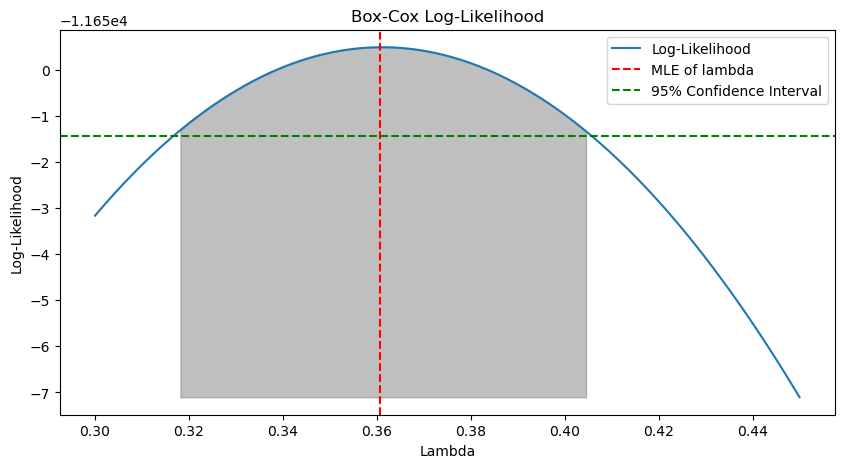

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(lambda_range, log_likelihood, label='Log-Likelihood')
plt.axvline(x=max_ll_lambda, color='r', linestyle='--', label='MLE of lambda')
plt.axhline(y=max(log_likelihood) - chi2_val, color='g', linestyle='--', label='95% Confidence Interval')
plt.fill_between(lambda_range, log_likelihood.min(), log_likelihood, where=(log_likelihood >= max(log_likelihood) - chi2_val), color='gray', alpha=0.5)
plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.title('Box-Cox Log-Likelihood')
plt.show()